# Content

In this notebook we run our algorithm to distinguish the classes of the SP data. Each point represents two classes and and one day. The pipeline goes as follows

* We first load the data from the `SP_Classes_2_per_day` folder
* We then generate the embeddings
* For visualization porpuses we plot the embeddings in 2 dimensions using *UMAP* algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import matplotlib.cm as cm
from collections import Counter
from matplotlib.colors import Normalize
import umap

import sys
sys.path += ['Package']

from MatrixDistance import *

import warnings
warnings.filterwarnings("ignore")

2023-11-02 11:12:09.068445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-02 11:12:09.068474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# # load the data
# ROOT = 'Data/SP_Classes_2_per_day/'
# all_files = listdir(ROOT)

# n = len(all_files)
# gt = [x.split('-')[0] for x in all_files]

# DFT = []

# for file in all_files:
#     DFT.append(pd.read_csv(ROOT + file))
    
# school = np.array([x.split('-')[0] for x in all_files])
# classes = np.array([x.split('-')[1] for x in all_files])
    
# # generate the embeddings
# λlist = []

# for i in range(n):
#     # print progress
#     print(str(i+1) + '/' + str(n), end = '\r')
    
#     N = len(np.unique(DFT[i][['i', 'j']].values))
#     X = GraphDynamicEmbedding(DFT[i], dim = 32, n = N, n_epochs = 30, η = 1)
#     λlist.append(np.linalg.eigvalsh(X.T@X))
    
# np.savetxt('Data/Embeddings/2PerClass.dat', np.array(λlist))

In [3]:
# # SP class
# Xclass = np.loadtxt('Data/Embeddings/2PerClass.dat')
# Xclass_embedded = TSNE(n_components = 2, perplexity = 50).fit_transform(Xclass)
# all_files = listdir('Data/SP_Classes_2_per_day/')
# gt = [x.split('-')[0] for x in all_files]

# # synthetic data
# Xsynth = np.loadtxt('Data/Embeddings/Synthetic/embs.txt')
# n_graphs = 250
# Xsynth_embedded = TSNE(n_components = 2, perplexity = 50).fit_transform(Xsynth)
# gt_synth = np.concatenate([[i for x in range(n_graphs)] for i in range(4)])
# size = np.loadtxt('Data/Embeddings/Synthetic/size.txt')

In [240]:
Xclass = np.loadtxt('Data/Embeddings/2PerClass.dat')
Xclass_embedded = umap.UMAP(n_neighbors = 500, min_dist = 1).fit_transform(Xclass)

all_files = listdir('Data/SP_Classes_2_per_day/')
gt = [x.split('-')[0] for x in all_files]

# synthetic data
Xsynth = np.loadtxt('Data/Embeddings/Synthetic/embs_32.txt')
n_graphs = 250
Xsynth_embedded = umap.UMAP(n_neighbors = 500, min_dist = 1).fit_transform(Xsynth)
gt_synth = np.concatenate([[i for x in range(n_graphs)] for i in range(4)])
size = np.loadtxt('Data/Embeddings/Synthetic/size_32.txt')

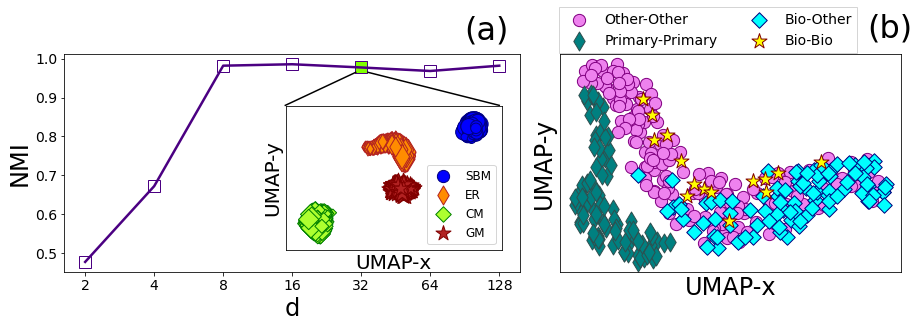

In [251]:
from matplotlib.gridspec import GridSpec
  
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)] 

fig = plt.figure(figsize = (15, 4))
gs = GridSpec(1, 2, width_ratios = [10, 7.5], wspace = 0.1)
ax = [fig.add_subplot(g) for g in gs]



vary_d = np.loadtxt('Data/Embeddings/Synthetic/vary_d.dat')

ax[0].plot(np.log2(vary_d[0]), vary_d[1], marker = 's', markersize = 12, fillstyle = 'none', color = 'indigo',
          linewidth = 2.5)
ax[0].set_xticks(np.log2(vary_d[0]), vary_d[0].astype(int), fontsize = 14)
ax[0].set_xlabel('d', fontsize = 24)
t = np.linspace(0.5, 1, 6)
ax[0].set_yticks(t, t, fontsize = 14)
ax[0].set_ylabel('NMI', fontsize = 24)


ax[0].scatter(5, vary_d[1][4], marker = 's', s = 150, color = 'chartreuse')
ax[0].plot([4.92, 3.9], [0.965, 0.88], color = 'k')
ax[0].plot([5.1, 7], [0.965, 0.88], color = 'k')

ax[0].text(6.5, 1.05, '(a)', fontsize = 32)

##########################################################################################################

left, bottom, width, height = [0.33, 0.2, 0.2, 0.5]
axins = fig.add_axes([left, bottom, width, height])

norm = Normalize(vmin = 0, vmax = 6)
cmap = cm.Oranges

m = cm.ScalarMappable(norm=norm, cmap=cmap)


labels = ['SBM', 'ER', 'CM', 'GM']

colors = ['blue', 'darkorange', 'greenyellow', 'firebrick']
colors2 = ['violet', 'teal', 'cyan', 'yellow']

edgecolors = ['navy', 'firebrick', 'green', 'maroon']
edgecolors2 = ['purple', 'darkslategrey', 'navy', 'maroon',]
markers = ['o', 'd', 'D', '*', 's']
sizes = [150, 180, 120, 250, 200]

X_ = copy(Xsynth_embedded)

X_[:,0] = X_[:,0] - X_[:,0].mean()
X_[:,1] = X_[:,1] - X_[:,1].mean()


for i in [0, 1, 2, 3]:

    axins.scatter(X_[:,0][gt_synth == i], X_[:,1][gt_synth == i], marker = markers[i], 
            color = colors[i], edgecolor = edgecolors[i], label = labels[i], 
                  s = sizes[i]/1000*np.array(size)[gt_synth == i])
    

axins.legend(loc = 4, fontsize = 12, ncol = 1)
f = 0.25
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim((1+f)*np.min(X_[:,0]), (1+f)*np.max(X_[:,0]))
axins.set_ylim((1+f)*np.min(X_[:,1]), (1+f)*np.max(X_[:,1]))
axins.set_xlabel('UMAP-x', fontsize = 20)
axins.set_ylabel('UMAP-y', fontsize = 20)


##########################################################################################################

school = np.array([x.split('-')[0] for x in all_files])
classes = np.array([x.split('-')[1] for x in all_files])
classes1 = [x.split('_')[0] for x in classes]
classes2 = [x.split('_')[1] for x in classes]

ClassMapper = {'1A': 0, '1B': 0, '2A': 0, '2B': 0,
'2BIO1': 1, '2BIO2': 1, '2BIO3': 1, '3A': 0,
'3B': 0, '4A': 0, '4B': 0, '5A': 0,
'5B': 0, 'MP': 2, 'MP*1': 2, 'MP*2': 2, 
'PC': 2, 'PC*': 2, 'PSI*': 2}

cl = [tuple([ClassMapper[x], ClassMapper[y]]) for x, y in zip(classes1, classes2)]

all_classes = list(Counter(cl).keys())

MapperNames = {0: 'Primary', 1: 'Bio', 2: 'Other'}

school = np.array([x.split('-')[0] for x in all_files])
schools = np.unique(school)

for i, s in enumerate(all_classes):
    idx = np.array([x == s for x in cl])
    ax[1].scatter(Xclass_embedded[:,0][idx], Xclass_embedded[:,1][idx], marker = markers[i], 
                      edgecolor = edgecolors2[i], s = sizes[i], color = colors2[i], 
                  label = MapperNames[s[0]] + '-' + MapperNames[s[1]])

    
ax[1].legend(loc = 'upper center', bbox_to_anchor=(0.435, 1.25), fontsize = 14,
          ncol = 2, fancybox = False, shadow = False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('UMAP-x', fontsize = 24)
ax[1].set_ylabel('UMAP-y', fontsize = 24)

ax[1].text(10.5, 12.3, '(b)', fontsize = 32)

plt.tight_layout()
# plt.savefig('../Paper/Figures/recognize_graphs.pdf', dpi = 400, bbox_inches = 'tight')
plt.show()